## Data Collection

In [1]:
import pandas as pd

# Load the dataset
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(10)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
count=data.isnull().sum()
count

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [3]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Renaming columns for better readability
data.columns = ["CustomerID", "Gender", "Age", "AnnualIncome", "SpendingScore"]


In [ ]:
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19.000000,15.0,39.0
1,2,Male,21.000000,15.0,81.0
2,3,Female,38.704663,16.0,6.0
3,4,Female,23.000000,16.0,77.0
4,5,Female,31.000000,NaN,40.0
...,...,...,...,...,...
195,196,Female,35.000000,120.0,79.0
196,197,Female,45.000000,126.0,28.0
197,198,Male,32.000000,126.0,74.0
198,199,Male,32.000000,137.0,18.0


In [5]:
mode_gender=data['Gender'].mode()[0]
type(mode_gender)
mode_gender

'Female'

In [ ]:
data.head(20)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19.000000,15.0,39.0
1,2,Male,21.000000,15.0,81.0
2,3,Female,38.704663,16.0,6.0
3,4,Female,23.000000,16.0,77.0
4,5,Female,31.000000,NaN,40.0
5,6,Female,22.000000,NaN,76.0
6,7,Female,35.000000,18.0,6.0
7,8,Female,23.000000,18.0,94.0
8,9,Male,64.000000,19.0,NaN
9,10,Female,30.000000,19.0,72.0


In [6]:
# Data transformation (e.g., encoding categorical variables)
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [8]:
data

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


## EDA

In [9]:
data.describe()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.560000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

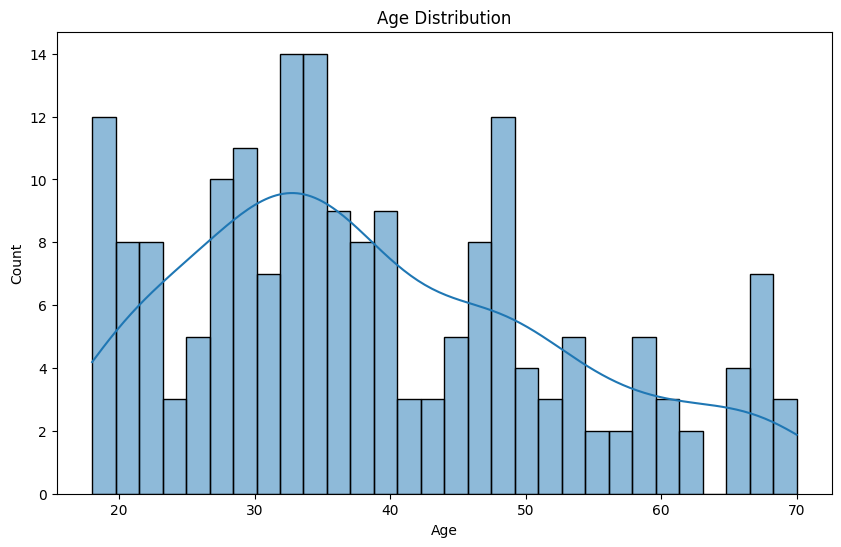

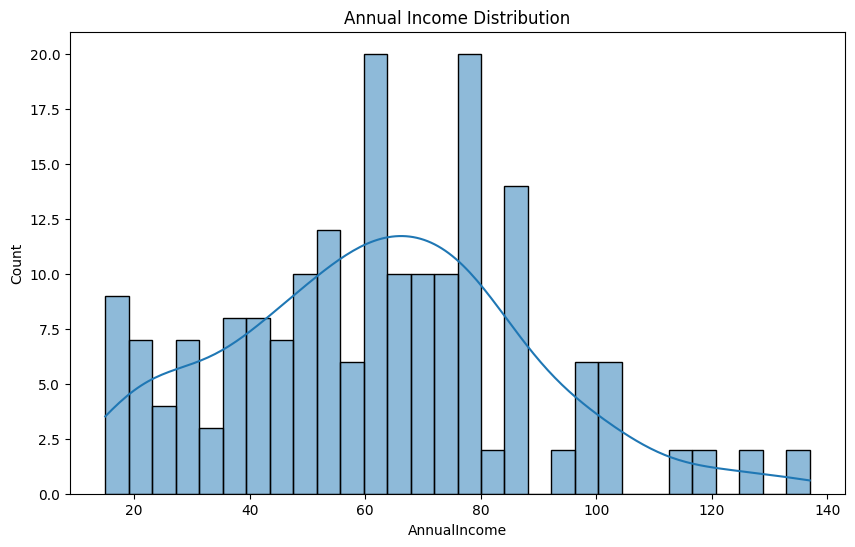

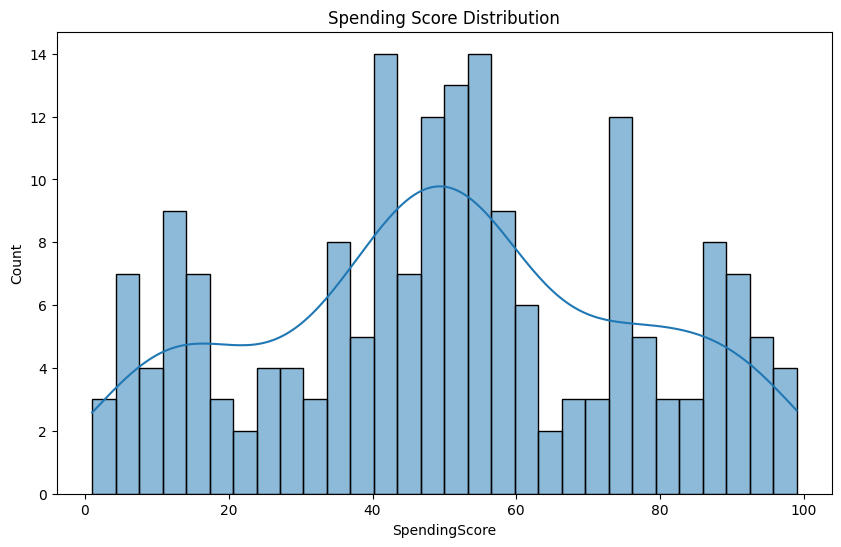

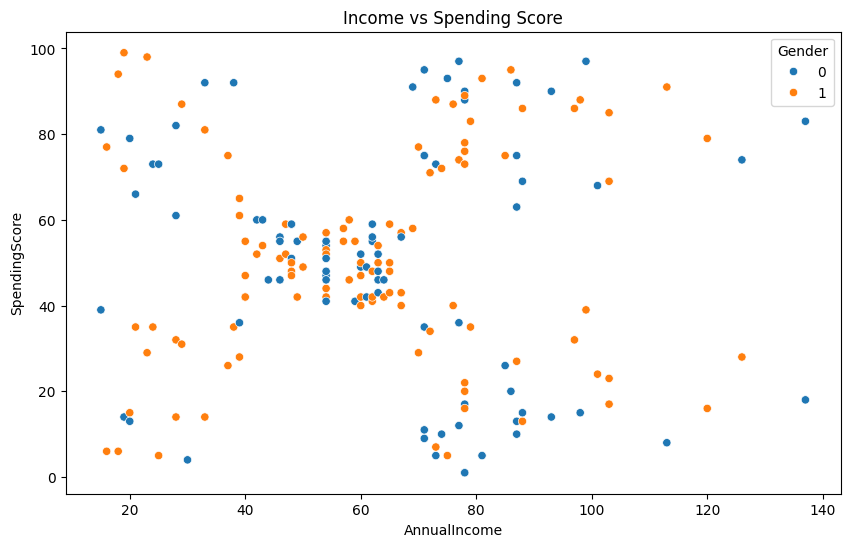

In [ ]:
#histplot-Age,Annual income,Spending score
# Visualizing distributions
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['AnnualIncome'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['SpendingScore'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

# Visualizing relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Gender')
plt.title('Income vs Spending Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


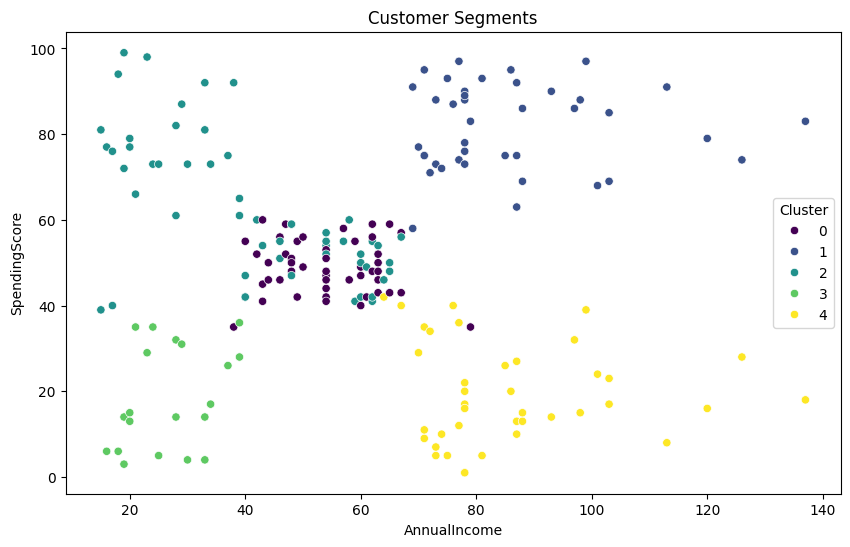

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature selection
features = data[['Age', 'AnnualIncome', 'SpendingScore']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluating cluster quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AnnualIncome', y='SpendingScore', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()


Assigning the independent variable since it is Clustering Model there's no dependent variable.

In [15]:

x=data.iloc[:,[3,4]].values

Finding the WCSS (Within Cluster Sum of Square) values using KMeans Clustering Model

In [16]:
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
display(wcss)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30273.394312070042,
 25028.020475269415,
 21818.114588452176,
 19740.0103703593]

Plotting the Line Graph with WCSS Values to get the exact ideal number of clusters to be created using KMeans Clustering Algorithm and saving the PNG file of the graph.

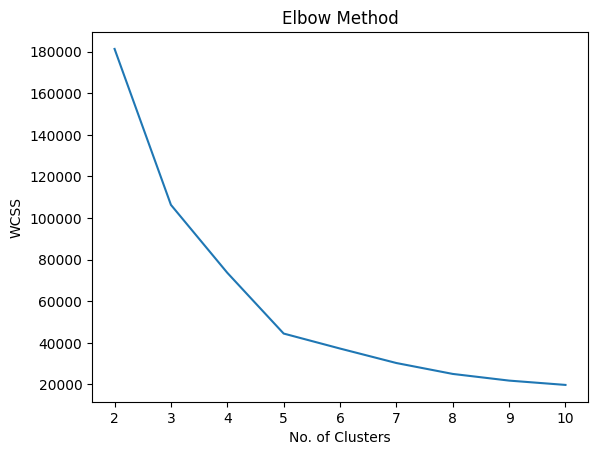

In [17]:
plt.plot(range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow Method Graph.png')
plt.show()

Fitting the KMeans Clustering model with ideal number of clusters found from Elbow Method Graph and getting the dataset belonging to the Cluster.

In [18]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(x)
y_kmeans=kmeans.labels_
display(y_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.

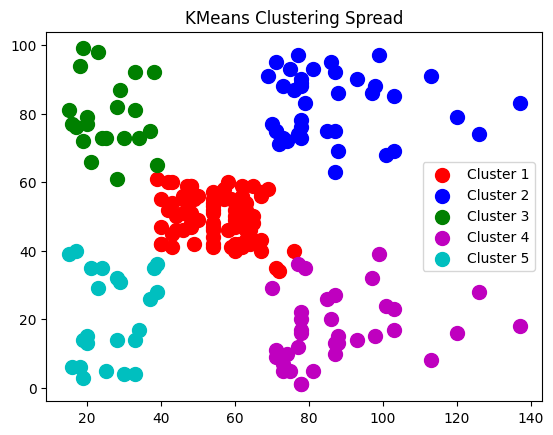

In [19]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],c='r',s=100,label='Cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],c='b',s=100,label='Cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],c='g',s=100,label='Cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],c='m',s=100,label='Cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],c='c',s=100,label='Cluster 5')
plt.title('KMeans Clustering Spread')
plt.savefig('Kmeans Clustering Spread Graph.png')
plt.legend()
plt.show()

Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset

In [21]:
result=pd.concat([data,pd.DataFrame(y_kmeans,columns=['Cluster Number'])],axis=1)
display(result)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,Cluster Number
0,1,0,19,15,39,2,4
1,2,0,21,15,81,2,2
2,3,1,20,16,6,3,4
3,4,1,23,16,77,2,2
4,5,1,31,17,40,2,4
...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,1
196,197,1,45,126,28,4,3
197,198,0,32,126,74,1,1
198,199,0,32,137,18,4,3


Grouping By The Cluster Number to see the number of values in each Clusters

In [22]:
result.groupby('Cluster Number').size()

Cluster Number
0    81
1    39
2    22
3    35
4    23
dtype: int64

Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score for each Clusters.

In [28]:
import numpy as np

result.groupby('Cluster Number').agg({'AnnualIncome':[np.min,np.max],'SpendingScore':[np.min,np.max]})

AnnualIncome      SpendingScore    
                        min  max           min max
Cluster Number                                    
0                        39   76            34  61
1                        69  137            63  97
2                        15   39            61  99
3                        70  137             1  39
4                        15   39             3  40

Fitting the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Ward Method and predicting the dataset belonging to the Cluster.

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward')
y_hc = hc.fit_predict(x)

**Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.**

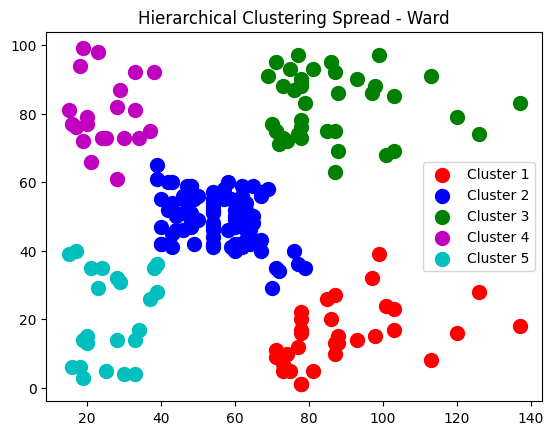

In [31]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],c='r',s=100,label='Cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],c='b',s=100,label='Cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],c='g',s=100,label='Cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],c='m',s=100,label='Cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],c='c',s=100,label='Cluster 5')
plt.title('Hierarchical Clustering Spread - Ward')
plt.savefig('Hierarchical Clustering Spread - Ward.png')
plt.legend()
plt.show()

Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset

In [33]:
result_hc_ward=pd.concat([data,pd.DataFrame(y_hc,columns=['Cluster Number'])],axis=1)
display(result_hc_ward)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,Cluster Number
0,1,0,19,15,39,2,4
1,2,0,21,15,81,2,3
2,3,1,20,16,6,3,4
3,4,1,23,16,77,2,3
4,5,1,31,17,40,2,4
...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,2
196,197,1,45,126,28,4,0
197,198,0,32,126,74,1,2
198,199,0,32,137,18,4,0


Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score and the number of values in each Clusters

In [35]:
result_hc_ward.groupby('Cluster Number').agg({'AnnualIncome':[np.min,np.max],'SpendingScore':[np.min,np.max,np.size]})

AnnualIncome      SpendingScore         
                        min  max           min max size
Cluster Number                                         
0                        71  137             1  39   32
1                        39   79            29  65   85
2                        69  137            63  97   39
3                        15   38            61  99   21
4                        15   39             3  40   23

Fitting the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Single Method and predicting the dataset belonging to the Cluster.

In [36]:
hc1=AgglomerativeClustering(n_clusters=7,linkage='single')
y_hc1=hc1.fit_predict(x)

Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.

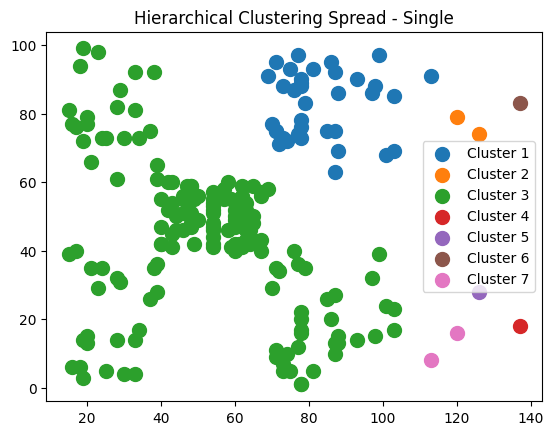

In [37]:
plt.scatter(x[y_hc1==0,0],x[y_hc1==0,1],s=100,label='Cluster 1')
plt.scatter(x[y_hc1==1,0],x[y_hc1==1,1],s=100,label='Cluster 2')
plt.scatter(x[y_hc1==2,0],x[y_hc1==2,1],s=100,label='Cluster 3')
plt.scatter(x[y_hc1==3,0],x[y_hc1==3,1],s=100,label='Cluster 4')
plt.scatter(x[y_hc1==4,0],x[y_hc1==4,1],s=100,label='Cluster 5')
plt.scatter(x[y_hc1==5,0],x[y_hc1==5,1],s=100,label='Cluster 6')
plt.scatter(x[y_hc1==6,0],x[y_hc1==6,1],s=100,label='Cluster 7')
plt.title('Hierarchical Clustering Spread - Single')
plt.savefig('Hierarchical Clustering Spread - Single.png')
plt.legend()
plt.show()

Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset

In [38]:
result_hc_single=pd.concat([data,pd.DataFrame(y_hc1,columns=['Cluster Number'])],axis=1)
display(result_hc_single)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,Cluster Number
0,1,0,19,15,39,2,2
1,2,0,21,15,81,2,2
2,3,1,20,16,6,3,2
3,4,1,23,16,77,2,2
4,5,1,31,17,40,2,2
...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,1
196,197,1,45,126,28,4,4
197,198,0,32,126,74,1,1
198,199,0,32,137,18,4,3


Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score and the number of values in each Clusters.

In [39]:
result_hc_single.groupby('Cluster Number').agg({'AnnualIncome':[np.min,np.max],'SpendingScore':[np.min,np.max,np.size]})

AnnualIncome      SpendingScore         
                        min  max           min max size
Cluster Number                                         
0                        69  113            63  97   36
1                       120  126            74  79    2
2                        15  103             1  99  157
3                       137  137            18  18    1
4                       126  126            28  28    1
5                       137  137            83  83    1
6                       113  120             8  16    2

Plotting the histogram Graph using Complete Method to find out the exact ideal number of clusters to be created using Agglomerative Clustering Model with Complete Linkage and saving the PNG file

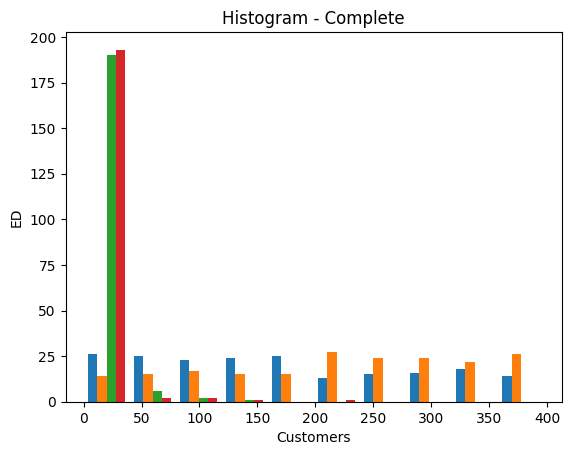

In [41]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage

hist = plt.hist(linkage(x, method='complete'))
plt.title('Histogram - Complete')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.savefig('Histogram Complete.png')
plt.show()

Fitting the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Complete Method and predicting the dataset belonging to the Cluster

In [42]:
hc2=AgglomerativeClustering(n_clusters=5,linkage='complete')
y_hc2=hc2.fit_predict(x)

**Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.**

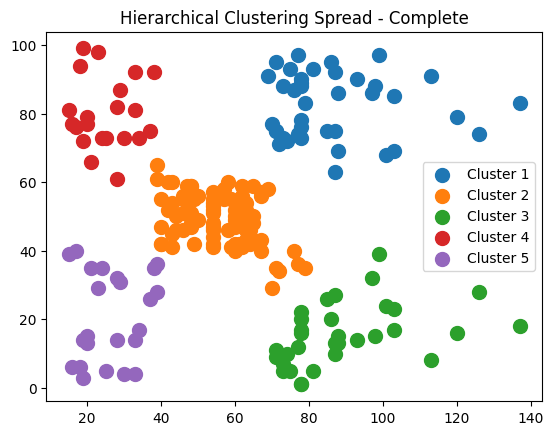

In [43]:
plt.scatter(x[y_hc2==0,0],x[y_hc2==0,1],s=100,label='Cluster 1')
plt.scatter(x[y_hc2==1,0],x[y_hc2==1,1],s=100,label='Cluster 2')
plt.scatter(x[y_hc2==2,0],x[y_hc2==2,1],s=100,label='Cluster 3')
plt.scatter(x[y_hc2==3,0],x[y_hc2==3,1],s=100,label='Cluster 4')
plt.scatter(x[y_hc2==4,0],x[y_hc2==4,1],s=100,label='Cluster 5')
plt.title('Hierarchical Clustering Spread - Complete')
plt.savefig('Hierarchical Clustering Spread - Complete.png')
plt.legend()
plt.show()

Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset

In [44]:
result_hc_complete=pd.concat([data,pd.DataFrame(y_hc2,columns=['Cluster Number'])],axis=1)
display(result_hc_complete)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,Cluster Number
0,1,0,19,15,39,2,4
1,2,0,21,15,81,2,3
2,3,1,20,16,6,3,4
3,4,1,23,16,77,2,3
4,5,1,31,17,40,2,4
...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,0
196,197,1,45,126,28,4,2
197,198,0,32,126,74,1,0
198,199,0,32,137,18,4,2


Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score and the number of values in each Clusters.

In [45]:
result_hc_complete.groupby('Cluster Number').agg({'AnnualIncome':[np.min,np.max],'SpendingScore':[np.min,np.max,np.size]})

AnnualIncome      SpendingScore         
                        min  max           min max size
Cluster Number                                         
0                        69  137            63  97   39
1                        39   79            29  65   85
2                        71  137             1  39   32
3                        15   38            61  99   21
4                        15   39             3  40   23

Fitting the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Average Method and predicting the dataset belonging to the Cluster.

In [50]:
hc3=AgglomerativeClustering(n_clusters=7,linkage='average')
y_hc3=hc3.fit_predict(x)

Plotting the Scatter Plot Graph with the independent variable and the Cluster which it belongs and saving the PNG file.

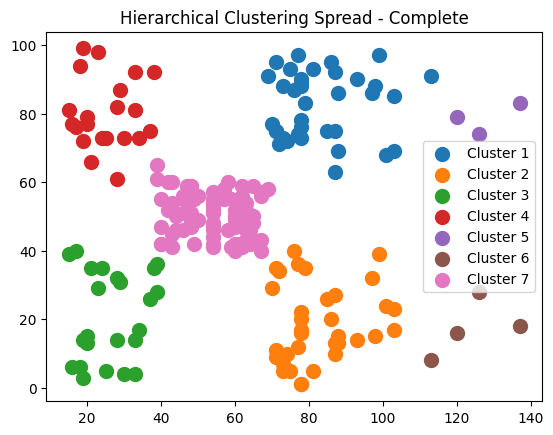

In [51]:
plt.scatter(x[y_hc3==0,0],x[y_hc3==0,1],s=100,label='Cluster 1')
plt.scatter(x[y_hc3==1,0],x[y_hc3==1,1],s=100,label='Cluster 2')
plt.scatter(x[y_hc3==2,0],x[y_hc3==2,1],s=100,label='Cluster 3')
plt.scatter(x[y_hc3==3,0],x[y_hc3==3,1],s=100,label='Cluster 4')
plt.scatter(x[y_hc3==4,0],x[y_hc3==4,1],s=100,label='Cluster 5')
plt.scatter(x[y_hc3==5,0],x[y_hc3==5,1],s=100,label='Cluster 6')
plt.scatter(x[y_hc3==6,0],x[y_hc3==6,1],s=100,label='Cluster 7')
plt.title('Hierarchical Clustering Spread - Complete')
plt.savefig('Hierarchical Clustering Spread - Complete.png')
plt.legend()
plt.show()

Merging the Cluster Number and adding the sepearte column for it with Original Dataset and displaying the resulting dataset

In [53]:
result_hc_average=pd.concat([data,pd.DataFrame(y_hc3,columns=['Cluster Number'])],axis=1)
display(result_hc_average)

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,Cluster Number
0,1,0,19,15,39,2,2
1,2,0,21,15,81,2,3
2,3,1,20,16,6,3,2
3,4,1,23,16,77,2,3
4,5,1,31,17,40,2,2
...,...,...,...,...,...,...,...
195,196,1,35,120,79,1,4
196,197,1,45,126,28,4,5
197,198,0,32,126,74,1,4
198,199,0,32,137,18,4,5


Grouping by the Cluster Number with respect to Annual Income and Spending Score to get the Minimum, Maximum values of Annual Income and Spending Score and the number of values in each Clusters.

In [54]:
result_hc_average.groupby('Cluster Number').agg({'AnnualIncome':[np.min,np.max],'SpendingScore':[np.min,np.max,np.size]})

AnnualIncome      SpendingScore         
                        min  max           min max size
Cluster Number                                         
0                        69  113            63  97   36
1                        70  103             1  40   34
2                        15   39             3  40   23
3                        15   38            61  99   21
4                       120  137            74  83    3
5                       113  137             8  28    4
6                        39   69            40  65   79